In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

from pandas import DataFrame

In [13]:
train_data_path = '../train.csv'
train = pd.read_csv(train_data_path)
test_data_path = '../test.csv'
test = pd.read_csv(test_data_path)

In [14]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [15]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


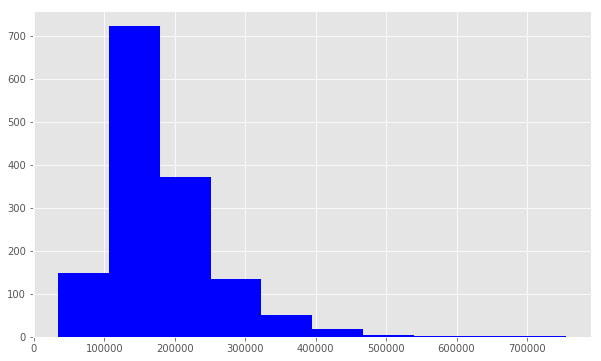

In [26]:
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [17]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [18]:
corr = numeric_features.corr()

In [19]:
print(corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [20]:
train.OverallQual.unique()

quality_pivot = train.pivot_table(index='OverallQual',
                                 values='SalePrice',aggfunc=np.median)

quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


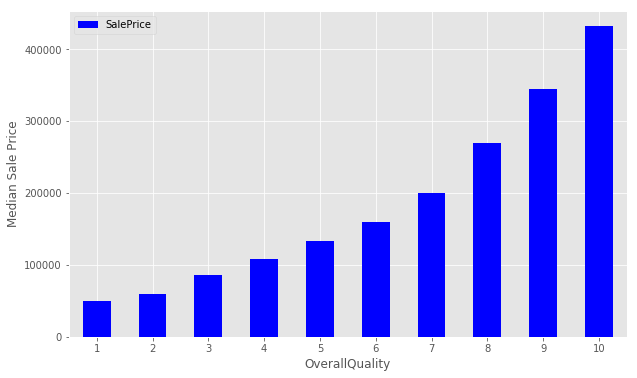

In [21]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('OverallQuality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

plt.show()

In [7]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('SalePrice')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [7]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()


In [7]:
train = train[train['GarageArea']<1200]
train = train[train['GarageArea']>0]

In [7]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

In [7]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

In [7]:
print("PoolQC's Unique values are:",train.PoolQC.unique())
print("MiscFeature's Unique values are:",train.MiscFeature.unique())
print("Alley's Unique values are:",train.Alley.unique())
print("Fence's Unique values are:",train.Fence.unique())
print("FireplaceQu's Unique values are:",train.FireplaceQu.unique())
print("BsmtFinType2's Unique values are:",train.BsmtFinType2.unique())
print("BsmtExposure's Unique values are:",train.BsmtExposure.unique())
print("BsmtQual's Unique values are:",train.BsmtQual.unique())
print("BsmtCond's Unique values are:",train.BsmtCond.unique())
print("BsmtFinType1's Unique values are:",train.BsmtFinType1.unique())
print("MasVnrType's Unique values are:",train.MasVnrType.unique())
print("Electrical's Unique values are:",train.Electrical.unique())

print("MasVnrArea's Unique values are:",train.MasVnrArea.unique())


In [7]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
print("original: \n")
print(train.Street.value_counts(), "\n")

In [7]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [8]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


In [9]:
condition_pivot = train.pivot_table(index='Street',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Street')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

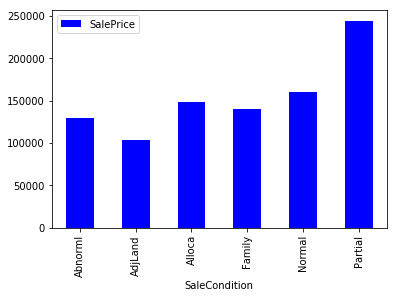

In [10]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [11]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = train.SaleCondition.apply(encode)

In [11]:
condition_pivot = train.pivot_table(index='enc_condition',
                                   values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [11]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

sum(data.isnull().sum() != 0)

y = np.log(train.SalePrice)
X = data.drop(['SalePrice','Id'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.33)

In [11]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train,y_train)

In [11]:
print("R^2 is: \n",model.score(X_test, y_test))

predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test,predictions))


actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
           color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression model')
plt.show()

In [11]:
for i in range(-2, 3):
    alpha = 10 ** i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha ={}'.format(alpha))
    overlay = 'R^2 is : {}\n RMSE is: {}'.format(
        ridge_model.score(X_test, y_test),
        mean_squared_error(y_test, preds_ridge))
    # plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()


In [11]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = model.predict(feats)

final_predictions = np.exp(predictions)

print("original", predictions[:], "\n")
print("Final", final_predictions)

In [11]:
submission['SalePrice'] = final_predictions
submission.head()
submission.to_csv('submission1.csv', index=False)

NameError: name 'final_predictions' is not defined